In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

def sse(cluster):
    """
    Calculates the SSE for given cluster

    Params:
        cluster (np array): The cluster in which to find the SSE
        return (float): SSE value for the cluster
    """
    cluster_mean = np.mean(cluster, axis=0)
    squared_errors = (cluster - cluster_mean) ** 2
    sse = np.sum(squared_errors)

    return sse


def bkmeans(X, k, iter):
    """
    Executes Bisecting k-means clustering with provided arguments

    Parameters:
        X (numpy array): Data to perform clustering on
        k (int): Number of differnt clusters to seperate out
        iter (int): Number of times to iterate inside of K means
        return (numpy array): n x 1 vector with cluster indices for each of the observations
    """
    # Single cluster containing all observations
    clusters = [X]

    # Bisecting k-Means
    while len(clusters) < k:
        # Find cluster with the largest SSE
        largeSSE_cluster = clusters[0]
        bigestSSE = sse(clusters[0])

        for cluster in clusters[1:]:
            current_sse = sse(cluster)
            if current_sse > bigestSSE:
                bigestSSE = current_sse
                largeSSE_cluster = cluster
        
        # K-Means on the cluster from above
        kmean = KMeans(n_clusters=2, n_init=iter)
        kmean.fit(largeSSE_cluster)
        labels = kmean.labels_
        
        # Split into two clusters
        sub1 = largeSSE_cluster[labels == 0]
        sub2 = largeSSE_cluster[labels == 1]
        
        # Remove largest cluster add two subclusters
        tmp_clusters = []
        for cluster in clusters:
            if not np.array_equal(cluster, largeSSE_cluster):
                tmp_clusters.append(cluster)
        clusters = tmp_clusters
        clusters.append(sub1)
        clusters.append(sub2)

    # Assign cluster indices for data points
    cluster_indices = np.zeros(X.shape[0])
    for i, cluster in enumerate(clusters):
        indices = np.isin(X, cluster).all(axis=1)
        cluster_indices[indices] = i

    return cluster_indices.reshape([-1, 1])

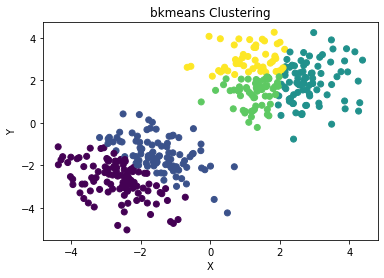

In [3]:
################################ Testing ################################

np.random.seed(0)
n = 200
p = 2
X = np.concatenate((np.random.randn(n, p) + 2, np.random.randn(n, p) - 2))

k = 5
iterations = 10
cluster_indices = bkmeans(X, k, iterations)

plt.scatter(X[:, 0], X[:, 1], c=cluster_indices)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('bkmeans Clustering')
plt.show()
